## Este notebook ilustra como o campo gravitacional se altera em função de uma redistribuição de massa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fatiando.vis import mpl, myv
from fatiando import gridder, mesher, gravmag, utils
from fatiando.gravmag import prism

%matplotlib inline

C:\Users\flora\Anaconda2\lib\site-packages\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
C:\Users\flora\Anaconda2\lib\site-packages\fatiando\vis\myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


#### Cálculo do potencial gravitacional Vn(x, y, z) produzido por um cubo homogêneo. Este cubo será denominado cubo normal (CN)

In [2]:
# Construção do CN com aresta L

L = 1000000
z0 = -0.5*L
rhon = 1000
CN = [mesher.Prism(-0.5*L, 0.5*L, -0.5*L, 0.5*L, z0, z0+L, props={'density': rhon})]

MCN = rhon*L**3 # massa

CN2D = [mesher.Polygon([[ 0.5*L, -0.5*L], 
                        [ 0.5*L,  0.5*L], 
                        [-0.5*L,  0.5*L], 
                        [-0.5*L, -0.5*L]])]

In [3]:
# Conjunto de pontos sobre os quais o potencial será calculado

lambida = 0.2*L
area = [-lambida+z0, z0+lambida, 
        -lambida, lambida]
shape = (100,100)

z, y, x = gridder.regular(area, shape, z = 0.0)

bounds = [-0.5*L, 0.5*L, -0.5*L, 0.5*L, -0.5*L, 0.5*L] # Limites da região de visualização 3D
myv.figure(size=(800,800))
myv.prisms(CN, prop='density', opacity = 0.5)
myv.points(np.vstack((x, y, z)).T, color=(1, 0, 0), size=5000, opacity=1)
ax = myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.0f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.0
myv.savefig('CN.png')
myv.show()

### Cálculo do potencial gravitacional $V_{n}(x,y,z)$ produzido pelo CN. Por conveniência, $V_{n}(x,y,z)$ será denominado potencial gravitacional normal

In [4]:
Vn = prism.potential(x, y, z,CN)

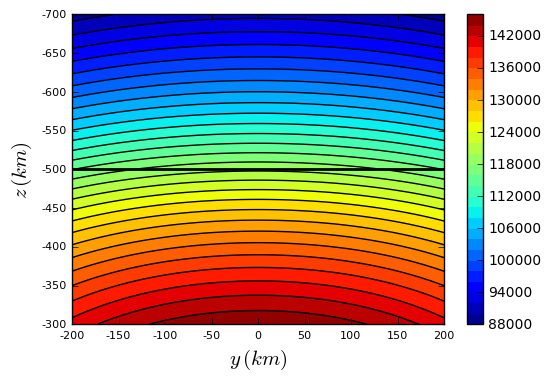

In [5]:
mpl.close('all')
mpl.figure(figsize=(6,4))
nlevels=mpl.contourf(y, z, Vn, shape, 30)
mpl.colorbar()
mpl.contour(y, z, Vn, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CN2D):
    mpl.polygon(p, style='-k', linewidth=2)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=15)
mpl.ylabel('$z \, (km)$', fontsize=15)
mpl.xticks(fontsize=8)
mpl.yticks(fontsize=8)
mpl.m2km()
mpl.show()

As equipontenciais do cubo normal (CN) são funções da distribuição de massa dentro deste. É possível redistribuir a massa dentro do volume do cubo normal de tal forma que o potencial gravitacional seja igual (ou muito próximo) ao potencial Vn(x,y,z). Dessa forma, ao redistribuir a massa, é possível criar heterogeneidades locais de massa em relação ao CN. Estas heterogeneidades locais são denominadas massas anômalas

In [6]:
# Construção de um cubo CA com distribuição de massa diferente daquela do CN, 
# mas que produz um potencial Va(x,y,z)~Vn(x,y,z)

#modelo 3D
CA = list(CN)

la = 0.05*L
rhoa = 10000

X11 = -0.5*la
X12 = 0.5*la
Y11 = -0.5*la
Y12 = 0.5*la
Z11 = z0-la
Z12 = z0

X21 = -0.5*la
X22 = 0.5*la
Y21 = -0.5*la
Y22 = 0.5*la
Z21 = z0+L-la
Z22 = z0+L

CA.append(mesher.Prism(X11, X12, Y11, Y12, Z11, Z12, props={'density': rhoa}))
CA.append(mesher.Prism(X21, X22, Y21, Y22, Z21, Z22, props={'density': -rhoa}))

#modelo 2D
CA2D = list(CN2D)
CA2D.append(mesher.Polygon([[Y11, Z11], 
                            [Y12, Z11], 
                            [Y12, Z12], 
                            [Y11, Z12]]))
CA2D.append(mesher.Polygon([[Y21, Z21], 
                            [Y22, Z21], 
                            [Y22, Z22], 
                            [Y21, Z22]]))

myv.figure(size=(800,800))
myv.prisms([CA[0]], prop='density', opacity = 0.3)
myv.prisms([CA[1]], prop='density', opacity = 1)
myv.prisms([CA[2]], prop='density', opacity = 1)
#myv.points(np.vstack((x, y, z)).T, color=(1, 0, 0), size=5000, opacity=1)
ax = myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.0f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.0
myv.savefig('CA.png')
myv.show()

No handlers could be found for logger "mayavi.core.common"
Exception occurred in traits notification handler for object: <mayavi.tools.decorations.Axes object at 0x0000000014D010A0>, trait: extent, old value: [0 0 0 0 0 0], new value: [-500000.  500000. -500000.  500000. -500000.  500000.]
Traceback (most recent call last):
  File "C:\Users\flora\Anaconda2\lib\site-packages\traits\trait_notifiers.py", line 340, in __call__
    self.handler( *args )
  File "C:\Users\flora\Anaconda2\lib\site-packages\mayavi\tools\decorations.py", line 373, in _extent_changed
    axes.module_manager.source.outputs[0].bounds
AttributeError: 'Threshold' object has no attribute 'bounds'


Exception occurred in traits notification handler.
Please check the log file for details.


### Cálculo do potencial gravitacional  Va(x,y,z) produzido pelo CA

In [7]:
Va = prism.potential(x, y, z, CA)

C:\Users\flora\Anaconda2\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


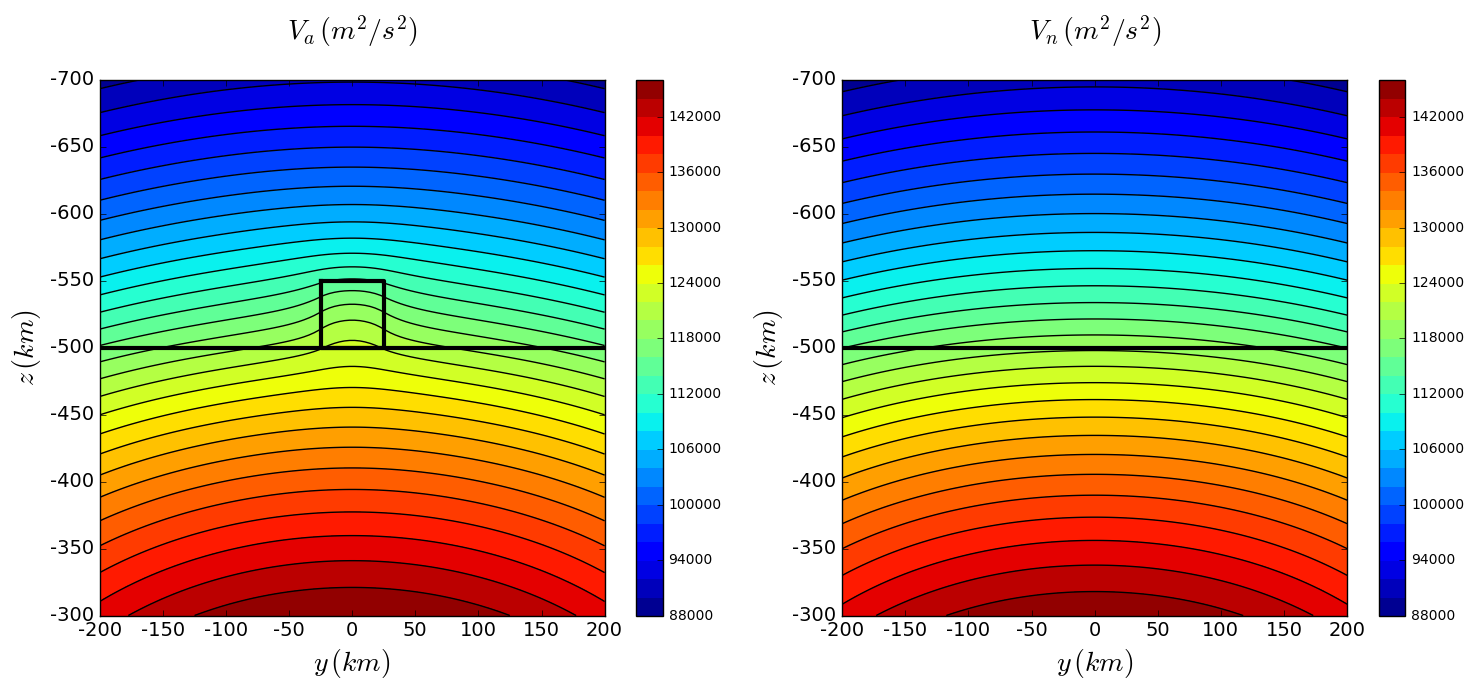

In [8]:
mpl.close('all')
mpl.figure(figsize=(15,7), tight_layout=True)
mpl.subplot(1,2,1)
mpl.title('$V_{a} \, (m^{2}/s^{2})$\n', fontsize=20)
nlevels = mpl.contourf(y, z, Va, shape, 30)
mpl.colorbar()
mpl.contour(y, z, Va, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CA2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(1,2,2)
mpl.title('$V_{n} \, (m^{2}/s^{2})$\n', fontsize=20)
mpl.contourf(y, z, Vn, shape, nlevels)
mpl.colorbar()
mpl.contour(y, z, Vn, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CN2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

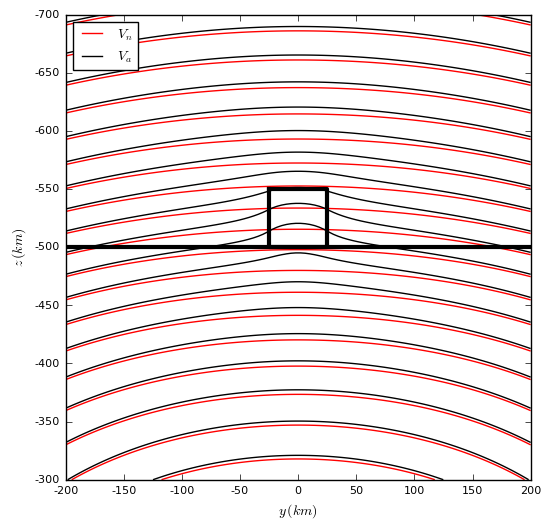

In [9]:
mpl.close('all')
mpl.figure(figsize=(6,6))
nlevels = mpl.contour(y, z, Vn, shape, 20, color='r', 
                      linewidth=1, clabel=False, label='$V_{n}$')
mpl.contour(y, z, Va, shape, nlevels, color='k', 
            linewidth=1, clabel=False, label='$V_{a}$')
for i, p in enumerate(CA2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=10)
mpl.ylabel('$z \, (km)$', fontsize=10)
mpl.xticks(fontsize=8)
mpl.yticks(fontsize=8)
mpl.legend(loc='upper left', fontsize=10)
mpl.m2km()
mpl.show()

In [10]:
# Construção de um cubo CB com distribuição de massa diferente daquela do CN, 
# mas que produz um potencial Vb(x,y,z)~Vn(x,y,z)

#modelo 3D
CB = list(CN)

lb = 0.05*L
rhob = 10000

X11 = -0.5*lb
X12 = 0.5*lb
Y11 = -0.5*lb
Y12 = 0.5*lb
Z11 = z0
Z12 = z0+lb

X21 = -0.5*lb
X22 = 0.5*lb
Y21 = -0.5*lb
Y22 = 0.5*lb
Z21 = z0+L-lb
Z22 = z0+L

CB.append(mesher.Prism(X11, X12, Y11, Y12, Z11, Z12, props={'density': -rhob}))
CB.append(mesher.Prism(X21, X22, Y21, Y22, Z21, Z22, props={'density': rhob}))

#modelo 2D
CB2D = list(CN2D)
CB2D.append(mesher.Polygon([[Y11, Z11], 
                            [Y12, Z11], 
                            [Y12, Z12], 
                            [Y11, Z12]]))
CB2D.append(mesher.Polygon([[Y21, Z21], 
                            [Y22, Z21], 
                            [Y22, Z22], 
                            [Y21, Z22]]))

myv.figure(size=(800,800))
myv.prisms([CB[0]], prop='density', opacity = 0.3)
myv.prisms([CB[1]], prop='density', opacity = 1)
myv.prisms([CB[2]], prop='density', opacity = 1)
#myv.points(np.vstack((x, y, z)).T, color=(1, 0, 0), size=5000, opacity=1)
ax = myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.0f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.0
myv.savefig('CB.png')
myv.show()

Exception occurred in traits notification handler for object: <mayavi.tools.decorations.Axes object at 0x00000000310B81A8>, trait: extent, old value: [0 0 0 0 0 0], new value: [-500000.  500000. -500000.  500000. -500000.  500000.]
Traceback (most recent call last):
  File "C:\Users\flora\Anaconda2\lib\site-packages\traits\trait_notifiers.py", line 340, in __call__
    self.handler( *args )
  File "C:\Users\flora\Anaconda2\lib\site-packages\mayavi\tools\decorations.py", line 373, in _extent_changed
    axes.module_manager.source.outputs[0].bounds
AttributeError: 'Threshold' object has no attribute 'bounds'


Analogamente ao modelo CA, o modelo CB é composto pelo CN (azul transparente) e duas heterogeneidades de massa em relação ao CN (cubinhos azuis sólidos). Estas heterogeneidades de massa (massas anômalas) em relação ao CN possuem a mesma densidade, mas com o sinal oposto. Assim, a massa do modelo CB é a mesma daquela do modelo CN. A massa anômala localizada na parte superior possui densidade negativa. A massa anômala localizada na parte inferior possui densidade positiva. Diferente do modelo CA, as duas massas anômalas do modelo CB estão no interior do cubo maior (azul transparente).

### Cálculo do potencial gravitacional Vb(x,y,z) 

In [11]:
Vb = prism.potential(x,y,z,CB)

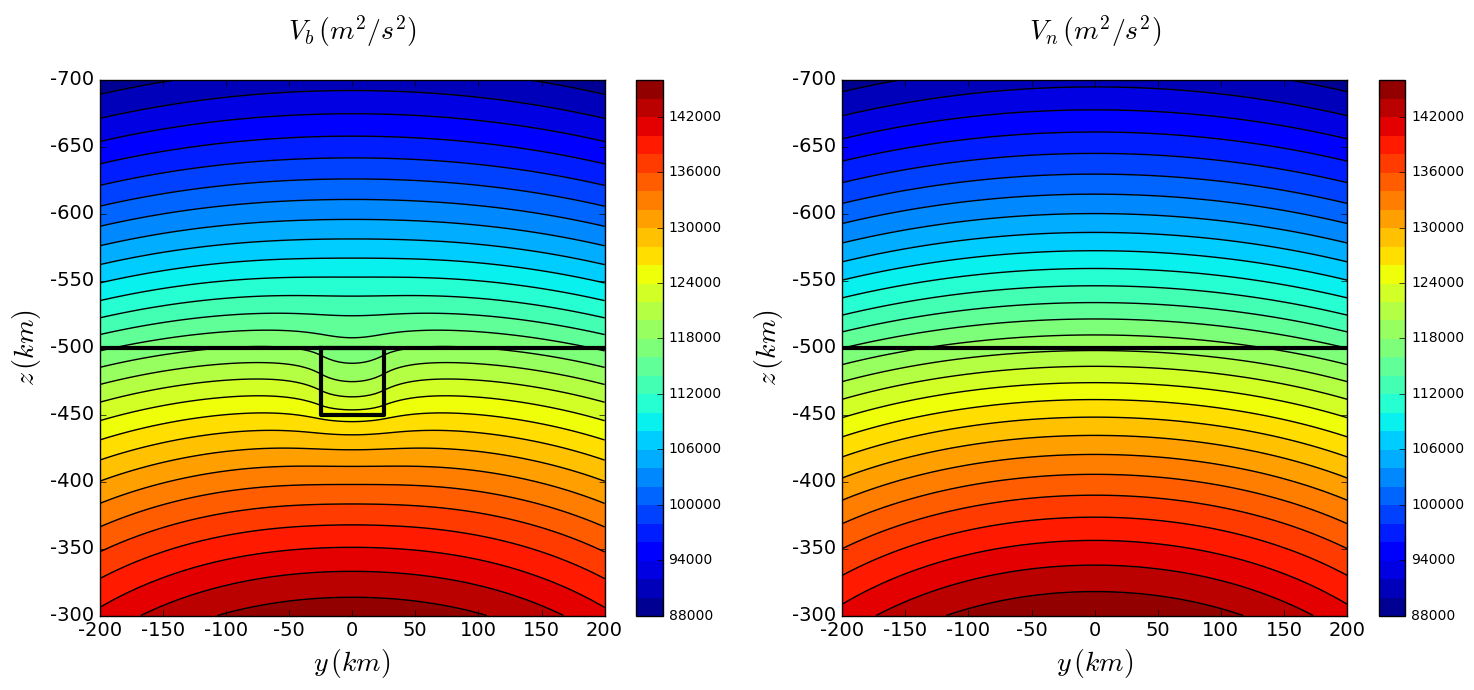

In [12]:
mpl.close('all')
mpl.figure(figsize=(15,7), tight_layout=True)
mpl.subplot(1,2,1)
mpl.title('$V_{b} \, (m^{2}/s^{2})$\n', fontsize=20)
nlevels = mpl.contourf(y, z, Vb, shape, 30)
mpl.colorbar()
mpl.contour(y, z, Vb, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CB2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(1,2,2)
mpl.title('$V_{n} \, (m^{2}/s^{2})$\n', fontsize=20)
mpl.contourf(y, z, Vn, shape, nlevels)
mpl.colorbar()
mpl.contour(y, z, Vn, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CN2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

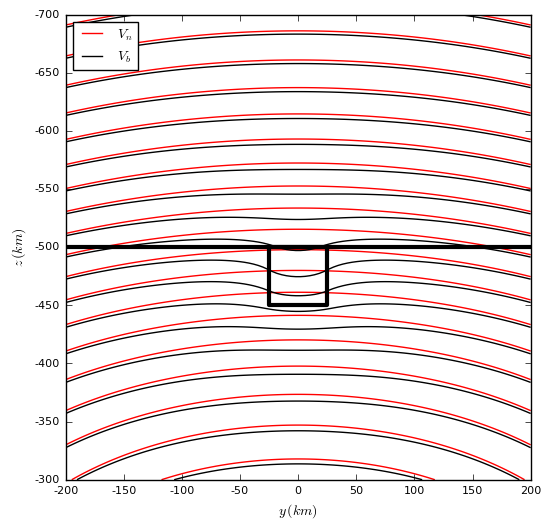

In [13]:
mpl.close('all')
mpl.figure(figsize=(6,6))
nlevels = mpl.contour(y, z, Vn, shape, 20, color='r', 
                      linewidth=1, clabel=False, label='$V_{n}$')
mpl.contour(y, z, Vb, shape, nlevels, color='k', 
            linewidth=1, clabel=False, label='$V_{b}$')
for i, p in enumerate(CB2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=10)
mpl.ylabel('$z \, (km)$', fontsize=10)
mpl.xticks(fontsize=8)
mpl.yticks(fontsize=8)
mpl.legend(loc='upper left', fontsize=10)
mpl.m2km()
mpl.show()

In [14]:
# Construção de um cubo CC com distribuição de massa diferente daquela do CN, 
# mas que produz um potencial Vc(x,y,z)~Vn(x,y,z)

#modelo 3D
CC = list(CN)

lc = 0.05*L
rhoc = 10000

X11 = -0.5*lc
X12 = 0.5*lc
Y11 = -0.5*lc
Y12 = 0.5*lc
Z11 = z0-lc
Z12 = z0

X21 = -0.5*lc
X22 = 0.5*lc
Y21 = -0.5*lc
Y22 = 0.5*lc
Z21 = z0
Z22 = z0+lc

CC.append(mesher.Prism(X11, X12, Y11, Y12, Z11, Z12, props={'density': rhoc}))
CC.append(mesher.Prism(X21, X22, Y21, Y22, Z21, Z22, props={'density': -rhoc}))

#modelo 2D
CC2D = list(CN2D)
CC2D.append(mesher.Polygon([[Y11, Z11], 
                            [Y12, Z11], 
                            [Y12, Z12], 
                            [Y11, Z12]]))
CC2D.append(mesher.Polygon([[Y21, Z21], 
                            [Y22, Z21], 
                            [Y22, Z22], 
                            [Y21, Z22]]))

myv.figure(size=(800,800))
myv.prisms([CC[0]], prop='density', opacity = 0.3)
myv.prisms([CC[1]], prop='density', opacity = 1)
myv.prisms([CC[2]], prop='density', opacity = 1)
#myv.points(np.vstack((x, y, z)).T, color=(1, 0, 0), size=5000, opacity=1)
ax = myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.0f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.0
myv.savefig('CC.png')
myv.show()

Exception occurred in traits notification handler for object: <mayavi.tools.decorations.Axes object at 0x000000001497F150>, trait: extent, old value: [0 0 0 0 0 0], new value: [-500000.  500000. -500000.  500000. -500000.  500000.]
Traceback (most recent call last):
  File "C:\Users\flora\Anaconda2\lib\site-packages\traits\trait_notifiers.py", line 340, in __call__
    self.handler( *args )
  File "C:\Users\flora\Anaconda2\lib\site-packages\mayavi\tools\decorations.py", line 373, in _extent_changed
    axes.module_manager.source.outputs[0].bounds
AttributeError: 'Threshold' object has no attribute 'bounds'


Analogamente ao modelo CA, o modelo CC é composto pelo CN (azul transparente) e duas heterogeneidades de massa em relação ao CN (cubinhos azuis sólidos). Estas heterogeneidades de massa (massas anômalas) em relação ao CN possuem a mesma densidade, mas com o sinal oposto. Assim, a massa do modelo CC é a mesma daquela do modelo CN. Diferentemente do modelo CA, as massas anômalas do modelo CC estão verticalmente justapostas. A massa anômala localizada na parte superior possui densidade positiva. A massa anômala localizada na parte inferior possui densidade negativa.

### Cálculo do potencial gravitacional Vc(x,y,z)

In [15]:
Vc = prism.potential(x,y,z,CC)

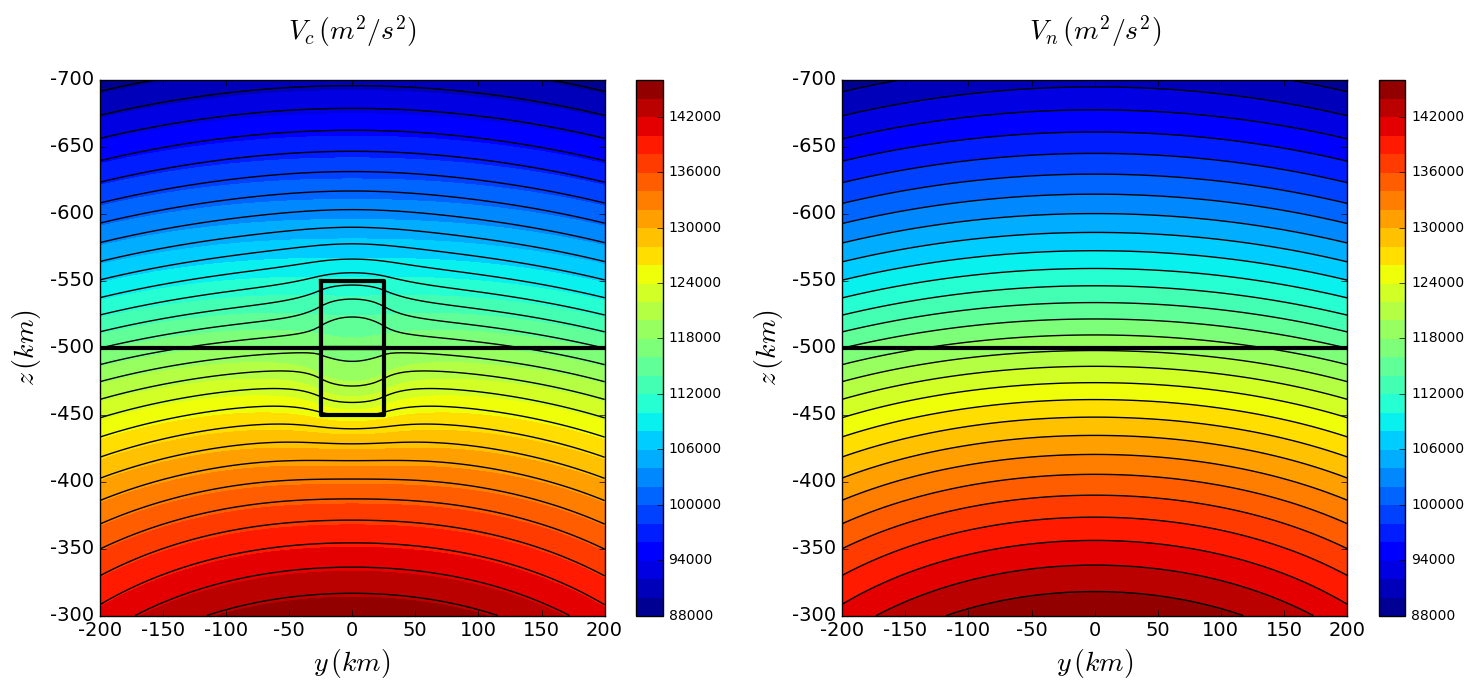

In [16]:
mpl.close('all')
mpl.figure(figsize=(15,7), tight_layout=True)
mpl.subplot(1,2,1)
mpl.title('$V_{c} \, (m^{2}/s^{2})$\n', fontsize=20)
nlevels = mpl.contourf(y, z, Vb, shape, 30)
mpl.colorbar()
mpl.contour(y, z, Vc, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CC2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(1,2,2)
mpl.title('$V_{n} \, (m^{2}/s^{2})$\n', fontsize=20)
mpl.contourf(y, z, Vn, shape, nlevels)
mpl.colorbar()
mpl.contour(y, z, Vn, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CN2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

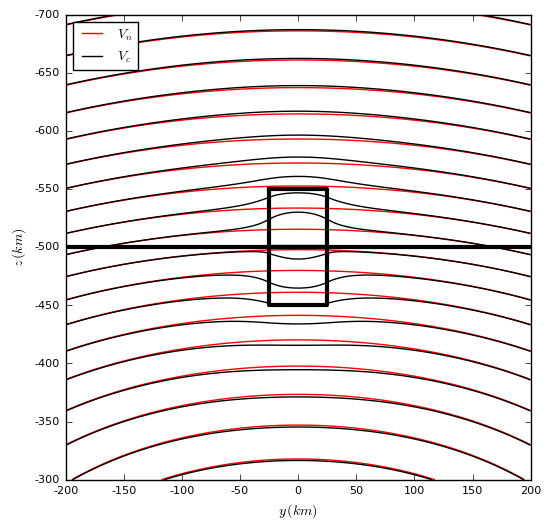

In [17]:
mpl.close('all')
mpl.figure(figsize=(6,6))
nlevels = mpl.contour(y, z, Vn, shape, 20, color='r', 
                      linewidth=1, clabel=False, label='$V_{n}$')
mpl.contour(y, z, Vc, shape, nlevels, color='k', 
            linewidth=1, clabel=False, label='$V_{c}$')
for i, p in enumerate(CC2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=10)
mpl.ylabel('$z \, (km)$', fontsize=10)
mpl.xticks(fontsize=8)
mpl.yticks(fontsize=8)
mpl.legend(loc='upper left', fontsize=10)
mpl.m2km()
mpl.show()

In [18]:
# Conjunto de pontos sobre os quais a componente vertical $z$ da aceleração gravitacional
# será calculada. Este conjunto de planos é um plano com coordenada vertical constante, localizado acima das massas.

lambida = 0.2*L
area = [-lambida, lambida, 
        -lambida, lambida]
shape = (101,101)

xp, yp, zp = gridder.regular(area, shape, z = -1.2*la+z0)
perfil = (xp == 0.0)

### Cálculo da componente $z$ (vertical) da aceleração gravitacional

In [19]:
gn = prism.gz(xp, yp, zp, CN)

ga = prism.gz(xp, yp, zp, CA)

gb = prism.gz(xp, yp, zp, CB)

gc = prism.gz(xp, yp, zp, CC)

### Cálculo do distúrbio de gravidade

In [20]:
da = ga - gn
db = gb - gn
dc = gc - gn

### Componente $z$ (vertical) da aceleração gravitacional $g_{a}$ e distúrbio gravitacional $d_{a}$

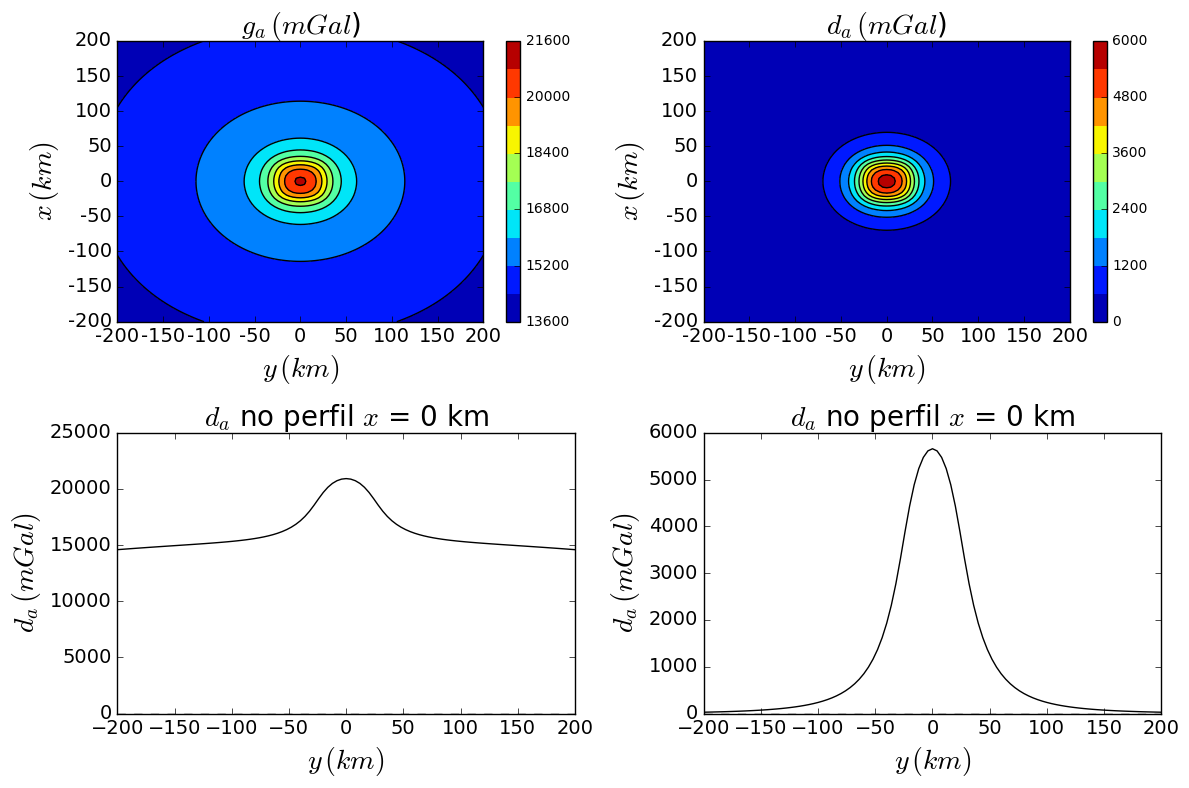

In [21]:
mpl.close('all')
mpl.figure(figsize=(12,8))

mpl.subplot(2,2,1)
mpl.title('$g_{a} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, ga, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, ga, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,2)
mpl.title('$d_{a} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, da, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, da, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title('$d_{a}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], ga[perfil], 'k-', markersize=5)
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d_{a} \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)

mpl.subplot(2,2,4)
mpl.title('$d_{a}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], da[perfil], 'k-', markersize=5)
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d_{a} \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)

mpl.tight_layout()

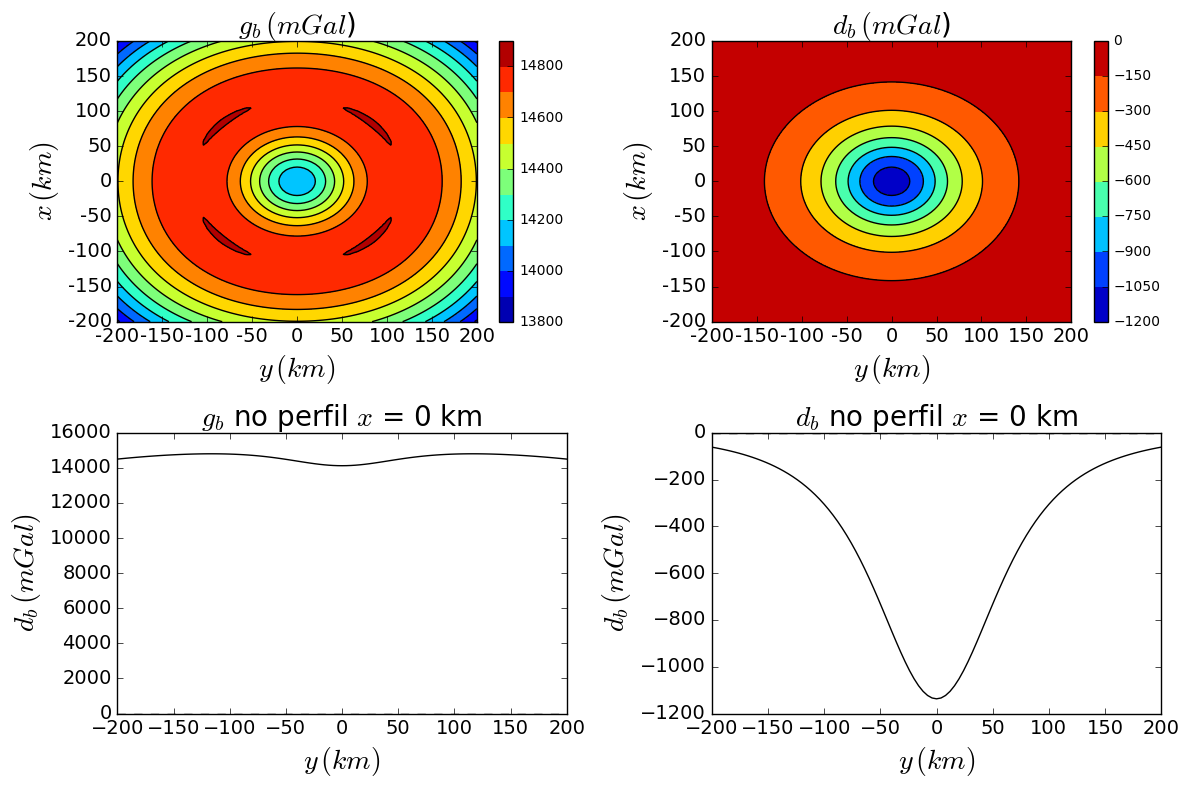

In [22]:
mpl.close('all')
mpl.figure(figsize=(12,8))

mpl.subplot(2,2,1)
mpl.title('$g_{b} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, gb, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, gb, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,2)
mpl.title('$d_{b} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, db, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, db, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title('$g_{b}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], gb[perfil], 'k-', markersize=5)
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d_{b} \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)

mpl.subplot(2,2,4)
mpl.title('$d_{b}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], db[perfil], 'k-', markersize=5)
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d_{b} \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)

mpl.tight_layout()

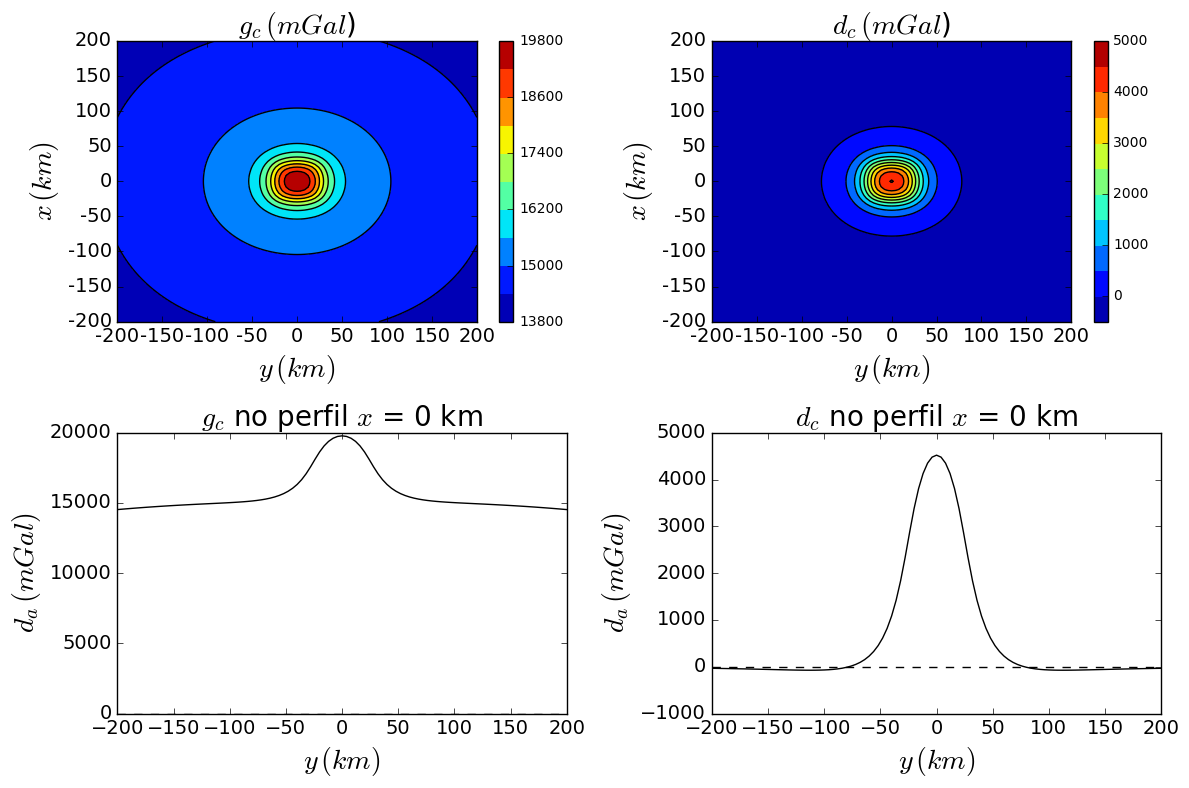

In [23]:
mpl.close('all')
mpl.figure(figsize=(12,8))

mpl.subplot(2,2,1)
mpl.title('$g_{c} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, gc, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, gc, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,2)
mpl.title('$d_{c} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, dc, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, dc, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title('$g_{c}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], gc[perfil], 'k-', markersize=5)
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d_{a} \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)

mpl.subplot(2,2,4)
mpl.title('$d_{c}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], dc[perfil], 'k-', markersize=5)
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d_{a} \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)

mpl.tight_layout()

## Efeito das massas topográficas

### Modelo da topografia do modelo CA

In [24]:
# modelo 3D
X1 = -0.5*la
X2 = 0.5*la
Y1 = -0.5*la
Y2 = 0.5*la
Z1 = z0-la
Z2 = z0

TA = [mesher.Prism(X1, X2, Y1, Y2, Z1, Z2, props={'density': rhoa})]

# modelo 2D
TA2D = [mesher.Polygon([[Y1, Z1], [Y2, Z1], [Y2, Z2], [Y1, Z2]])]

### Remoção da componente $z$ (vertical) da aceleração gravitacional exercida pela topografia do modelo CA. A topografia do modelo CA é representada pela massa anômala localizada na parte superior.

In [26]:
# Cálculo da componente z da aceleração gravitacional produzido por CA

ta = prism.gz(xp,yp,zp,TA)

# Distúrbio gravitacional corrigido do efeito da topografia dcorr

dacorr = da-ta

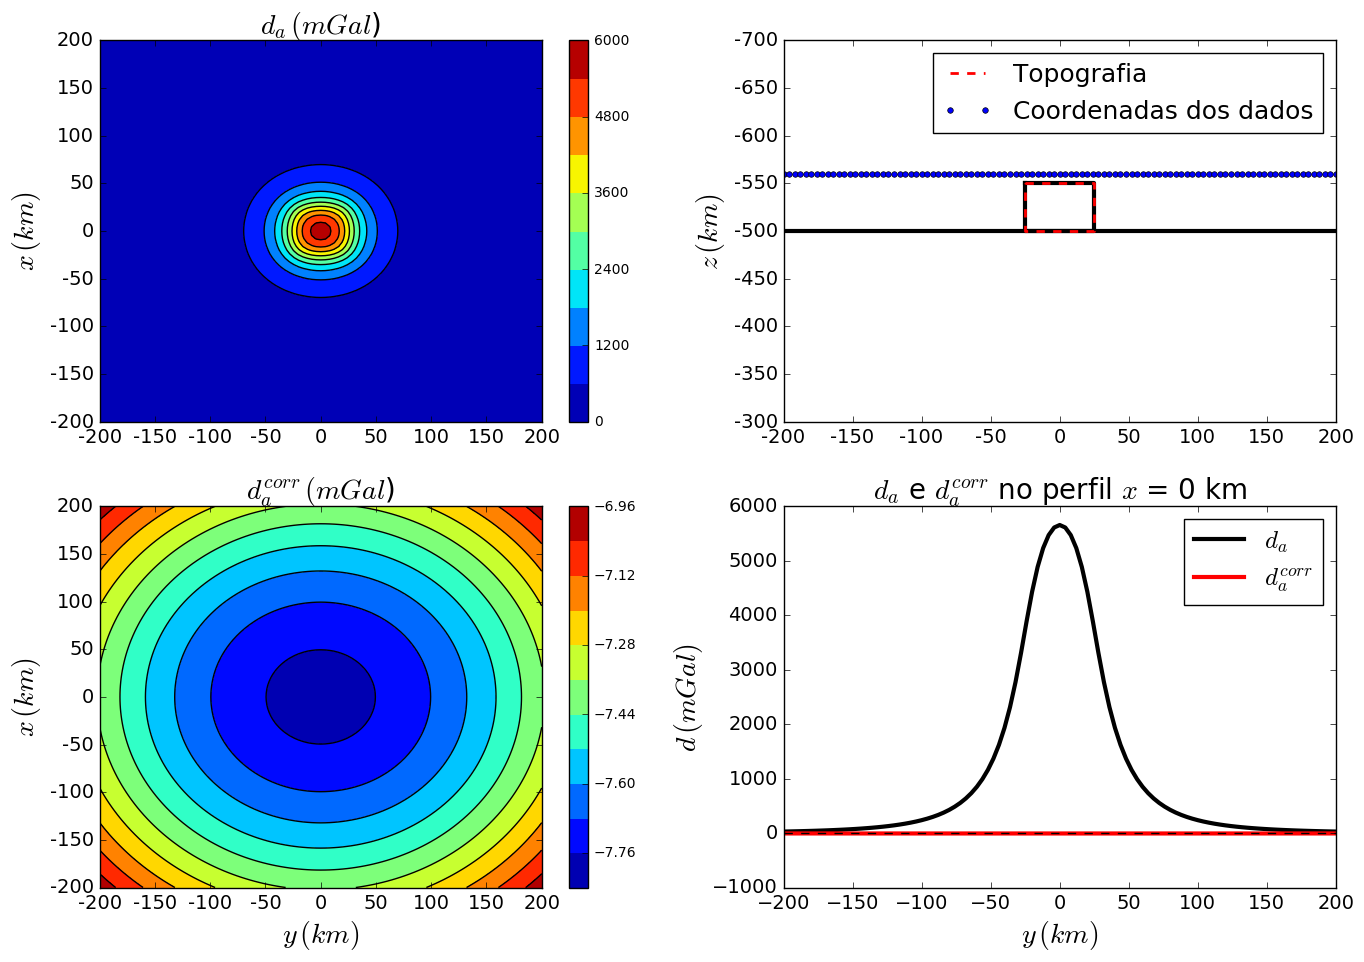

In [27]:
mpl.close('all')
mpl.figure(figsize=(14,10))

mpl.subplot(2,2,1)
mpl.title('$d_{a} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, da, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, da, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,2)
for i, p in enumerate(CA2D):
    mpl.polygon(p, style='-k', linewidth=3)
for i, p in enumerate(TA2D):
    mpl.polygon(p, style='--r', linewidth=2, 
                label='Topografia')
mpl.plot(yp[perfil], zp[perfil], 'bo', markersize=4, 
         label='Coordenadas dos dados')
mpl.xlim(area[2], area[3])
mpl.ylim(lambida+z0, -lambida+z0)
#mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='best', fontsize=18)
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title('$d_{a}^{corr} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, dacorr, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, dacorr, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title('$d_{a}$ e $d_{a}^{corr}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], da[perfil], 'k-', 
         linewidth=3, label='$d_{a}$')
mpl.plot(0.001*yp[perfil], dacorr[perfil], 'r-', 
         linewidth=3, label='$d_{a}^{corr}$')
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='best', fontsize=18, numpoints=1)

mpl.tight_layout(pad=2)

### Modelo da topografia do modelo CC 